In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import zeus21
from classy import Class
from zeus21.cosmology import growth

plt.rc('text', usetex=True)
plt.rc('font', family='serif', size=12)

In [12]:
ClassCosmo = Class()
params = {'output': 'mPk',
          'n_s': 0.965, 
          'H0': 67.4,
          'omega_b': 0.0224,
          'omega_cdm': 0.12,
          'tau_reio': 0.054,
          'sigma8': 0.811,
          'P_k_max_1/Mpc': 10
          }
ClassCosmo.set(params)
ClassCosmo.compute()

In [13]:
UserParams = zeus21.User_Parameters(precisionboost=1.2)
CosmoParams_input = zeus21.Cosmo_Parameters_Input()
ClassyCosmo = zeus21.runclass(CosmoParams_input)
CosmoParams = zeus21.Cosmo_Parameters(UserParams, CosmoParams_input, ClassyCosmo) 
# CorrFClass = zeus21.Correlations(UserParams, CosmoParams, ClassyCosmo)

In [ ]:
a_list = np.linspace(0.01, 1., 1000)
z_list = 1 / a_list - 1
Omega_m0 = 0.31
Omega_L0 = 1. - Omega_m0

def H(a):
    return np.sqrt(Omega_m0 * a**-3 + Omega_L0)

def D(a): # Linear growth factor
    integral = np.trapezoid(1 / (a**3 * (H(a))**3), a)
    D = 5 / 2 * Omega_m0 * H(a) * integral
    D_normalized = D / D[-1]
    return D_normalized

def D_approx(a):
    D_approx = 5 / 2 * a * Omega_m0 / (Omega_m0**(4/7) - Omega_L0 + (1 + Omega_m0/2) * (1 + Omega_L0/70))
    D_approx_normalized = D_approx / D_approx[-1]
    return D_approx_normalized

growth_exact = D(a_list)
growth_approx = D_approx(a_list)

In [15]:
growth_zeus = growth(CosmoParams, z_list)

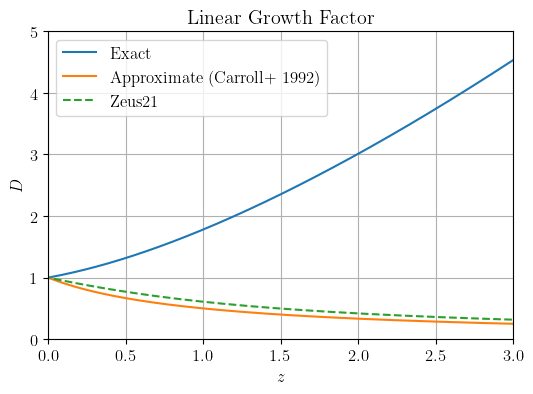

In [17]:
fig, ax = plt.subplots(1, 1, figsize=(6, 4))
ax.plot(z_list, growth_exact, label='Exact')
ax.plot(z_list, growth_approx, label='Approximate (Carroll+ 1992)')
ax.plot(z_list, growth_zeus, label='Zeus21', ls='--')
ax.set_xbound(0, 3)
ax.set_ybound(0, 5)
ax.set_xlabel(r'$z$')
ax.set_ylabel(r'$D$')
ax.set_title('Linear Growth Factor')
ax.grid(True)
ax.legend()

Obviously there's something way wrong with my implementation of the exact formula ://